<a href="https://colab.research.google.com/github/conexaomundom/TCC---Demographic-Categorial-Ordinal-Data-Regression-Model/blob/main/Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
install.packages("ggplot2")
install.packages("RColorBrewer")
install.packages("readr")
install.packages("readxl")
install.packages("nortest")
install.packages("forecast")


(as ‘lib’ is unspecified)







	‘/tmp/RtmpK4EfoB/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpK4EfoB/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpK4EfoB/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpK4EfoB/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpK4EfoB/downloaded_packages’

(as ‘lib’ is unspecified)
































































	‘/tmp/RtmpK4EfoB/downloaded_packages’



In [4]:
%%R
library("ggplot2")
library("RColorBrewer")
library("readr")
library("readxl")
library("nortest")

MODELO COMPLETO PARA JOÃO PESSOA

In [7]:
%%R
load("/content/PB2016.Rda")
posicao <- which(PB2016$Município == 250750) # 361094

jp_PB2016 <- data.frame(PB2016[posicao, ])


In [8]:
%%R
#
# length(levels(as.factor(PB2016$`CBO Ocupação 2002`))) # 1969
# levels(as.factor(PB2016$Faixa.Remun.Média..SM.))
# "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "99"
sm <- 880
# Pontos medios
pm <- c(0.5*sm, # 0
        ((0.51+1.0)/2)*sm, # 1
        ((1.01+1.5)/2)*sm, # 2
        ((1.51+2.0)/2)*sm, # 3
        ((2.01+3.0)/2)*sm, # 4
        ((3.01+4.0)/2)*sm, # 5
        ((4.01+5.0)/2)*sm, # 6
        ((5.01+7.0)/2)*sm, # 7
        ((7.01+10.0)/2)*sm, # 8
        ((10.01+15.0)/2)*sm, # 9
        ((15.01+20.0)/2)*sm, # 10
        (20.01)*sm) # 11

for(i in 0:11){
  p <- which(jp_PB2016$Faixa.Remun.Média..SM. == i)
  jp_PB2016$Faixa.Remun.Média..SM.[p] <- pm[i+1]
}

In [9]:
%%R
# "Faixa Etária"           "Faixa Remun Média (SM)"
# "Escolaridade após 2005" "Qtd Hora Contr"         "Município"              "Raça Cor"
# "Sexo Trabalhador"
#
#
# Modelo completo
jp_PB2016$Faixa.Etária[which(jp_PB2016$Faixa.Etária == 7)] <- 1
jp_PB2016$Raça.Cor[which(jp_PB2016$Raça.Cor == 8)] <- 1
jp_PB2016$Raça.Cor[which(jp_PB2016$Raça.Cor == 4)] <- 1
jp_PB2016$Faixa.Etária[which(jp_PB2016$Faixa.Etária == 99)] <- 1
jp_PB2016$Raça.Cor[which(jp_PB2016$Raça.Cor == 6)] <- 1
jp_PB2016$Escolaridade.após.2005[which(jp_PB2016$Escolaridade.após.2005 == 3)] <- 1


modelo_complt <- lm(Faixa.Remun.Média..SM. ~ as.factor(Sexo.Trabalhador) +
                      as.factor(Faixa.Etária) +  as.factor(Escolaridade.após.2005) +
                      Qtd.Hora.Contr + as.factor(Raça.Cor), data = jp_PB2016)
summary(modelo_complt)

# Selecao de variaveis                    Estimate Std. Error t value Pr(>|t|)
# as.factor(Faixa.Etária)7               32.0921   663.0239   0.048  0.96140
# as.factor(Raça.Cor)8                   22.651    105.399   0.215   0.8298
# as.factor(Raça.Cor)4                    7.750     24.706   0.314  0.75376
# as.factor(Faixa.Etária)99           -1581.944   1623.252  -0.975   0.3298
# as.factor(Raça.Cor)6                   53.490     52.061   1.027   0.3042
# as.factor(Escolaridade.após.2005)3     64.015     55.722   1.149  0.25063



Call:
lm(formula = Faixa.Remun.Média..SM. ~ as.factor(Sexo.Trabalhador) + 
    as.factor(Faixa.Etária) + as.factor(Escolaridade.após.2005) + 
    Qtd.Hora.Contr + as.factor(Raça.Cor), data = jp_PB2016)

Residuals:
    Min      1Q  Median      3Q     Max 
-7444.6  -983.4  -239.9   287.7 17211.4 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -456.985     39.663 -11.522  < 2e-16 ***
as.factor(Sexo.Trabalhador)2         -449.817      8.039 -55.958  < 2e-16 ***
as.factor(Faixa.Etária)2             -414.124     83.070  -4.985 6.19e-07 ***
as.factor(Faixa.Etária)3            -1028.424     15.229 -67.532  < 2e-16 ***
as.factor(Faixa.Etária)4            -1073.210     14.030 -76.492  < 2e-16 ***
as.factor(Faixa.Etária)5             -818.505     11.704 -69.934  < 2e-16 ***
as.factor(Faixa.Etária)6             -529.488     12.521 -42.289  < 2e-16 ***
as.factor(Faixa.Etária)8              769.528     30.010  25.642

In [10]:
%%R
#
#--------------------------------------------
#Analise Residual e de Diagnostico
#--------------------------------------------

residuo <- residuals(modelo_complt)
fit <- fitted.values(modelo_complt)

#Calculo dos Residuos padronizados, valores Ajustados, Medidas de Alavanca e Influencia

ard = ls.diag(modelo_complt)

respadron <- ard$std.res

hi <- ard$hat #medidas de alavanca
cook <- ard$cooks #medidas de influencia
dfits <- ard$dfits #medidas de influencia


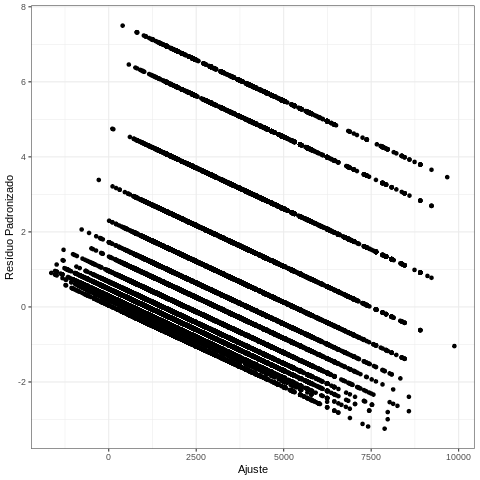

In [11]:
%%R
# Grafico de Homocedasticidade
library(ggplot2)
theme_set(theme_bw())
homo <- data.frame(fit, respadron)
g1 <- ggplot(homo, aes(fit, respadron))
g1 + geom_point() + labs(x = "Ajuste", y = "Resíduo Padronizado")


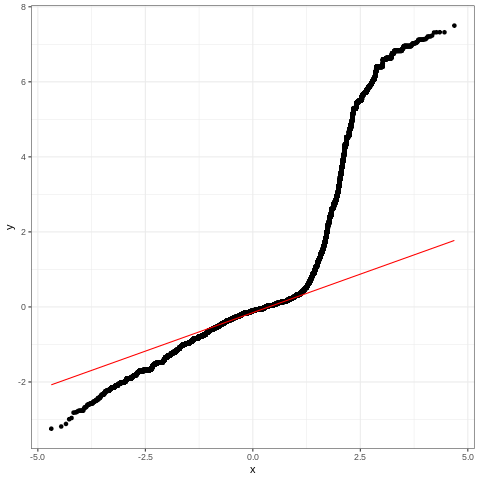

In [12]:
%%R
# Grafico de Normalidade
library(nortest)
lillie.test(respadron)
# shapiro.test(respadron)

ggplot(data.frame(respadron), aes(sample = respadron))+
  stat_qq() + stat_qq_line(colour = "red")

# qqnorm(respadron); qqline(respadron, col=2)

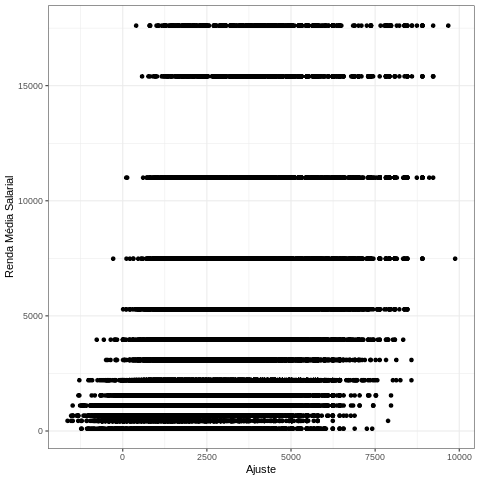

In [13]:
%%R
#Exmplo: caso de normaliadde
# = rnorm(100, 0, 1)
#qqnorm(respadron1); qqline(respadron1, col=2)

#Grafico de Linearidade
line <- data.frame(fit, jp_PB2016$Faixa.Remun.Média..SM.)
g3 <- ggplot(line, aes(fit, jp_PB2016$Faixa.Remun.Média..SM.)) + geom_point()
# g3 + geom_point() #+ labs(x = "Ajuste", y = "Resíduo Padronizado")
g3 + labs(x = "Ajuste", y = "Renda Média Salarial")

  method            from
  as.zoo.data.frame zoo 



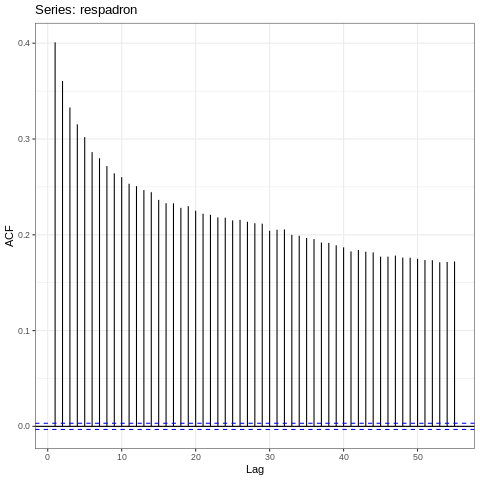

In [14]:
%%R
# Usando o gráfico de Autocorrelacao
# acf(respadron)
library(forecast)
ggAcf(respadron)

MODELOS UNITÁRIOS


In [ ]:
%%R
load("/content/PB2016.Rda")

In [15]:
%%R
#
# length(levels(as.factor(PB2016$`CBO Ocupação 2002`))) # 1969
# levels(as.factor(PB2016$Faixa.Remun.Média..SM.))
# "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "99"
sm <- 880
# Pontos medios
pm <- c(0.5*sm, # 0
        ((0.51+1.0)/2)*sm, # 1
        ((1.01+1.5)/2)*sm, # 2
        ((1.51+2.0)/2)*sm, # 3
        ((2.01+3.0)/2)*sm, # 4
        ((3.01+4.0)/2)*sm, # 5
        ((4.01+5.0)/2)*sm, # 6
        ((5.01+7.0)/2)*sm, # 7
        ((7.01+10.0)/2)*sm, # 8
        ((10.01+15.0)/2)*sm, # 9
        ((15.01+20.0)/2)*sm, # 10
        (20.01)*sm) # 11

for(i in 0:11){
  p <- which(jp_PB2016$Faixa.Remun.Média..SM. == i)
  jp_PB2016$Faixa.Remun.Média..SM.[p] <- pm[i+1]
}


length(which(jp_PB2016$Faixa.Remun.Média..SM. == 99)) # 5686


[1] 5686


In [16]:
%%R
# romando o modelo linear unitário Sexo.Trabalhador
modelo1 <- lm(Faixa.Remun.Média..SM. ~ as.factor(Sexo.Trabalhador), data = jp_PB2016)
summary(modelo1)


Call:
lm(formula = Faixa.Remun.Média..SM. ~ as.factor(Sexo.Trabalhador), 
    data = jp_PB2016)

Residuals:
    Min      1Q  Median      3Q     Max 
-2047.9 -1042.5  -955.5    57.5 15548.9 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  2146.929      5.694 377.040   <2e-16 ***
as.factor(Sexo.Trabalhador)2  -87.025      8.888  -9.791   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2627 on 361092 degrees of freedom
Multiple R-squared:  0.0002654,	Adjusted R-squared:  0.0002627 
F-statistic: 95.87 on 1 and 361092 DF,  p-value: < 2.2e-16



Analise Residual e de Diagnostico MODELOS UNITÁRIOS Var Sexo

In [17]:
%%R
# MODELOS UNITÁRIOS
#--------------------------------------------
#Analise Residual e de Diagnostico
#--------------------------------------------

residuo1 <- residuals(modelo1)
fit1 <- fitted.values(modelo1)

#Calculo dos Residuos padronizados, valores Ajustados, Medidas de Alavanca e Influencia

ard1 = ls.diag(modelo1)

respadron1 <- ard1$std.res

hi1 <- ard1$hat #medidas de alavanca
cook1 <- ard1$cooks #medidas de influencia
dfits1 <- ard1$dfits #medidas de influencia

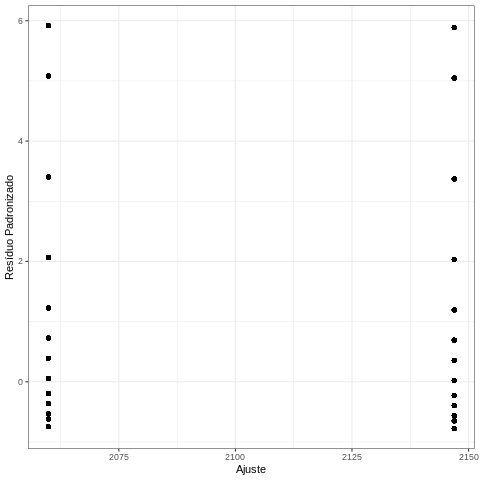

In [18]:
%%R
# Grafico de Homocedasticidade
library(ggplot2)
theme_set(theme_bw())
homo1 <- data.frame(fit1, respadron1)
g11 <- ggplot(homo1, aes(fit1, respadron1))
g11 + geom_point() + labs(x = "Ajuste", y = "Resíduo Padronizado")

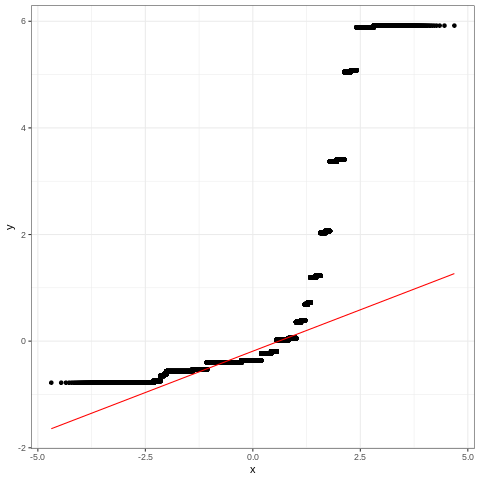

In [19]:
%%R
# Grafico de Normalidade
library(nortest)
lillie.test(respadron1)
# shapiro.test(respadron)

ggplot(data.frame(respadron1), aes(sample = respadron1))+
  stat_qq() + stat_qq_line(colour = "red")

# qqnorm(respadron); qqline(respadron, col=2)

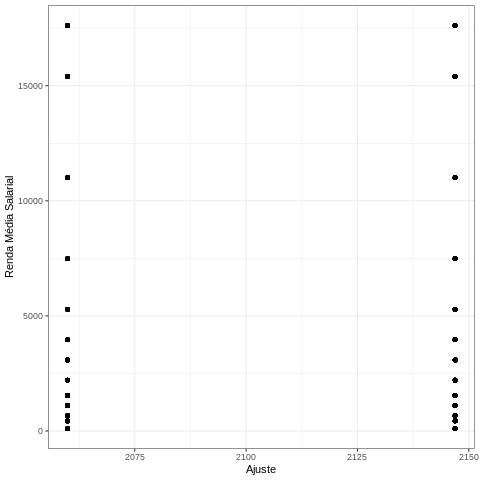

In [20]:
%%R
#Exmplo: caso de normaliadde
# = rnorm(100, 0, 1)
#qqnorm(respadron1); qqline(respadron1, col=2)

#Grafico de Linearidade
line1 <- data.frame(fit1, jp_PB2016$Faixa.Remun.Média..SM.)
g31 <- ggplot(line1, aes(fit1, jp_PB2016$Faixa.Remun.Média..SM.)) + geom_point()
# g31 + geom_point() #+ labs(x = "Ajuste", y = "Resíduo Padronizado")
g31 + labs(x = "Ajuste", y = "Renda Média Salarial")

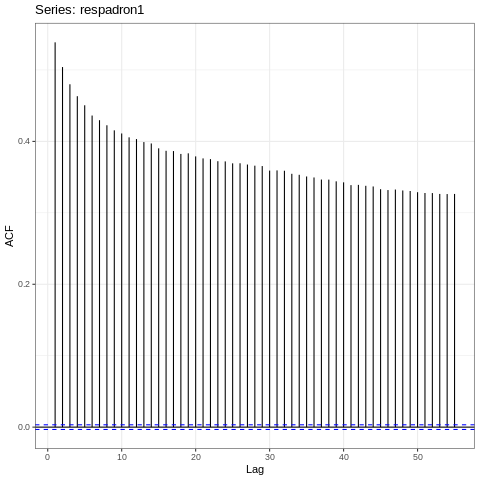

In [21]:
%%R
# Usando o gráfico de Autocorrelacao
# acf(respadron)
library(forecast)
ggAcf(respadron1)

MODELOS UNITÁRIOS Var Faixa etária

In [22]:
%%R
# romando o modelo linear unitário "Faixa Etária"
jp_PB2016$Faixa.Etária[which(jp_PB2016$Faixa.Etária == 99)] <- 1
jp_PB2016$Faixa.Etária[which(jp_PB2016$Faixa.Etária == 2)] <- 1
modelo2 <- lm(Faixa.Remun.Média..SM. ~ as.factor(Faixa.Etária), data = jp_PB2016)
summary(modelo2)
# Selecao de variaveis        Estimate Std. Error t value Pr(>|t|)
# as.factor(Faixa.Etária)99    276.1     1932.7   0.143 0.886401
# as.factor(Faixa.Etária)2    80.09     682.18   0.117 0.906535



Call:
lm(formula = Faixa.Remun.Média..SM. ~ as.factor(Faixa.Etária), 
    data = jp_PB2016)

Residuals:
    Min      1Q  Median      3Q     Max 
-4259.6 -1156.1  -467.2   -27.2 16477.2 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3165.668      9.788  323.43   <2e-16 ***
as.factor(Faixa.Etária)3 -2034.104     15.492 -131.30   <2e-16 ***
as.factor(Faixa.Etária)4 -1688.538     14.621 -115.49   <2e-16 ***
as.factor(Faixa.Etária)5 -1213.120     12.327  -98.41   <2e-16 ***
as.factor(Faixa.Etária)6  -905.131     13.488  -67.11   <2e-16 ***
as.factor(Faixa.Etária)8  1192.896     33.055   36.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2533 on 361088 degrees of freedom
Multiple R-squared:  0.07063,	Adjusted R-squared:  0.07062 
F-statistic:  5489 on 5 and 361088 DF,  p-value: < 2.2e-16



In [23]:
%%R
# romando o modelo linear unitário "Escolaridade após 2005"
jp_PB2016$Escolaridade.após.2005[which(jp_PB2016$Escolaridade.após.2005 == 6)] <- 1
jp_PB2016$Escolaridade.após.2005[which(jp_PB2016$Escolaridade.após.2005 == 3)] <- 1
modelo3 <- lm(Faixa.Remun.Média..SM. ~ as.factor(Escolaridade.após.2005), data = jp_PB2016)
summary(modelo3)
# Selecao de variaveis                    Estimate Std. Error t value Pr(>|t|)
# as.factor(Escolaridade.após.2005)6     13.46      54.24   0.248  0.80401
# as.factor(Escolaridade.após.2005)3     44.72      32.78   1.364    0.172


Call:
lm(formula = Faixa.Remun.Média..SM. ~ as.factor(Escolaridade.após.2005), 
    data = jp_PB2016)

Residuals:
    Min      1Q  Median      3Q     Max 
-6943.8  -975.9  -321.2   118.8 16373.3 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          1235.51      14.74  83.812  < 2e-16 ***
as.factor(Escolaridade.após.2005)2    192.09      26.27   7.313 2.63e-13 ***
as.factor(Escolaridade.após.2005)4    153.47      23.60   6.504 7.83e-11 ***
as.factor(Escolaridade.após.2005)5    844.75      17.24  49.009  < 2e-16 ***
as.factor(Escolaridade.após.2005)7    190.12      16.00  11.882  < 2e-16 ***
as.factor(Escolaridade.após.2005)8    553.98      26.20  21.145  < 2e-16 ***
as.factor(Escolaridade.após.2005)9   2858.24      17.26 165.615  < 2e-16 ***
as.factor(Escolaridade.após.2005)10  4332.80      55.99  77.390  < 2e-16 ***
as.factor(Escolaridade.após.2005)11  5807.24      91.96  63.149  < 2e-16 ***
---
Signif. codes:

In [24]:
%%R
# romando o modelo linear unitário `Qtd Hora Contr`
modelo4 <- lm(Faixa.Remun.Média..SM. ~ Qtd.Hora.Contr, data = jp_PB2016)
summary(modelo4)


Call:
lm(formula = Faixa.Remun.Média..SM. ~ Qtd.Hora.Contr, data = jp_PB2016)

Residuals:
    Min      1Q  Median      3Q     Max 
-3589.1  -972.3  -807.1  -285.5 15697.3 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3729.3765    24.7279  150.82   <2e-16 ***
Qtd.Hora.Contr  -41.3159     0.6215  -66.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2612 on 361092 degrees of freedom
Multiple R-squared:  0.01209,	Adjusted R-squared:  0.01209 
F-statistic:  4419 on 1 and 361092 DF,  p-value: < 2.2e-16



In [25]:
%%R
# romando o modelo linear unitário `Raça Cor`
jp_PB2016$Raça.Cor[which(jp_PB2016$Raça.Cor == 8)] <- 1
jp_PB2016$Raça.Cor[which(jp_PB2016$Raça.Cor == 6)] <- 1
modelo5 <- lm(Faixa.Remun.Média..SM. ~ as.factor(Raça.Cor), data = jp_PB2016)
summary(modelo5)
# Selecao de variaveis      Estimate Std. Error t value Pr(>|t|)
# as.factor(Raça.Cor)8     19.30     115.53   0.167 0.867360
# as.factor(Raça.Cor)6    29.241     57.086   0.512 0.608487


Call:
lm(formula = Faixa.Remun.Média..SM. ~ as.factor(Raça.Cor), 
    data = jp_PB2016)

Residuals:
    Min      1Q  Median      3Q     Max 
-3055.6  -950.2  -373.2    66.8 16228.6 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1477.586      6.427 229.904  < 2e-16 ***
as.factor(Raça.Cor)2   428.729     11.677  36.714  < 2e-16 ***
as.factor(Raça.Cor)9   -97.431     18.682  -5.215 1.84e-07 ***
as.factor(Raça.Cor)99 1676.977      9.686 173.141  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2516 on 361090 degrees of freedom
Multiple R-squared:  0.08288,	Adjusted R-squared:  0.08287 
F-statistic: 1.088e+04 on 3 and 361090 DF,  p-value: < 2.2e-16

